In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [47]:
# Cargar el dataset
df = pd.read_csv("movies_dataset_clean.csv")

C:\Users\nicol\AppData\Local\Temp\ipykernel_17284\2511033546.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("movies_dataset_clean.csv")


In [48]:
# 1. Análisis de la distribución de las variables numéricas
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

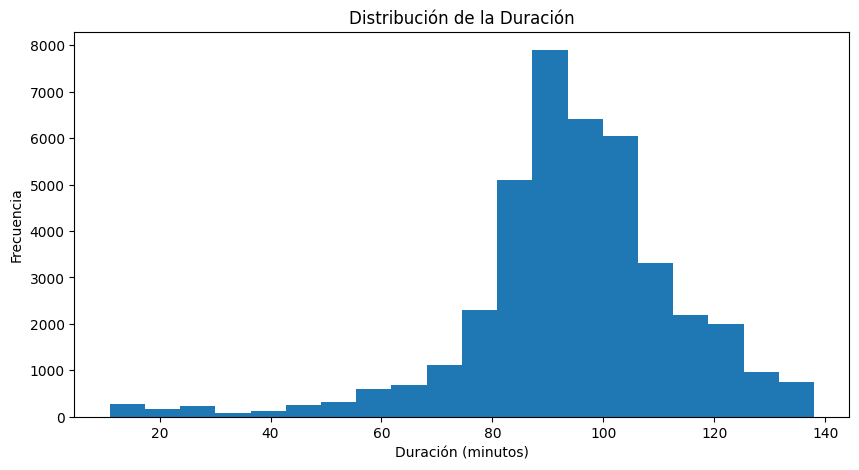

In [49]:
# Histograma de la duración (runtime)
# Calcular los percentiles 5 y 95 de la columna 'runtime'
percentil_5 = df['runtime'].quantile(0.05)
percentil_95 = df['runtime'].quantile(0.95)

# Generar el histograma con el rango ajustado en el eje x
plt.figure(figsize=(10, 5))
plt.hist(df['runtime'], bins=20, range=(percentil_5, percentil_95))
plt.title('Distribución de la Duración')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

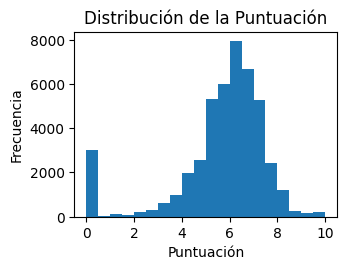

In [50]:
# Histograma de la puntuación (vote_average)
plt.subplot(2, 2, 4)
plt.hist(df['vote_average'], bins=20)
plt.title('Distribución de la Puntuación')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [51]:
# Análisis de la columna 'belongs_to_collection'
# Contar la cantidad de películas que pertenecen a una colección
num_pertenecen_coleccion = df['belongs_to_collection'].notna().sum()
print(f'Número de películas que pertenecen a una colección: {num_pertenecen_coleccion}')

Número de películas que pertenecen a una colección: 4491


In [ ]:
# Análisis de la columna 'production_companies'
# Contar la cantidad de películas producidas por cada compañía
production_companies_count = df['production_companies'].value_counts()
print(production_companies_count.head(10))  # Mostrar las 10 compañías más frecuentes


production_companies
Metro-Goldwyn-Mayer (MGM)                 742
Warner Bros.                              540
Paramount Pictures                        505
Twentieth Century Fox Film Corporation    439
Universal Pictures                        320
RKO Radio Pictures                        247
Columbia Pictures Corporation             207
Columbia Pictures                         146
Mosfilm                                   145
Walt Disney Pictures                       85
Name: count, dtype: int64


In [53]:
# Análisis de la columna 'production_countries'
# Contar la cantidad de películas producidas en cada país
production_countries_count = df['production_countries'].value_counts()
print(production_countries_count.head(10))  # Mostrar los 10 países más frecuentes

production_countries
United States of America                    17851
United Kingdom                               2238
France                                       1654
Japan                                        1356
Italy                                        1030
Canada                                        840
Germany                                       749
Russia                                        735
India                                         735
United Kingdom, United States of America      569
Name: count, dtype: int64


In [54]:
# Análisis de la columna 'release_date'
# Convertir la columna a datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


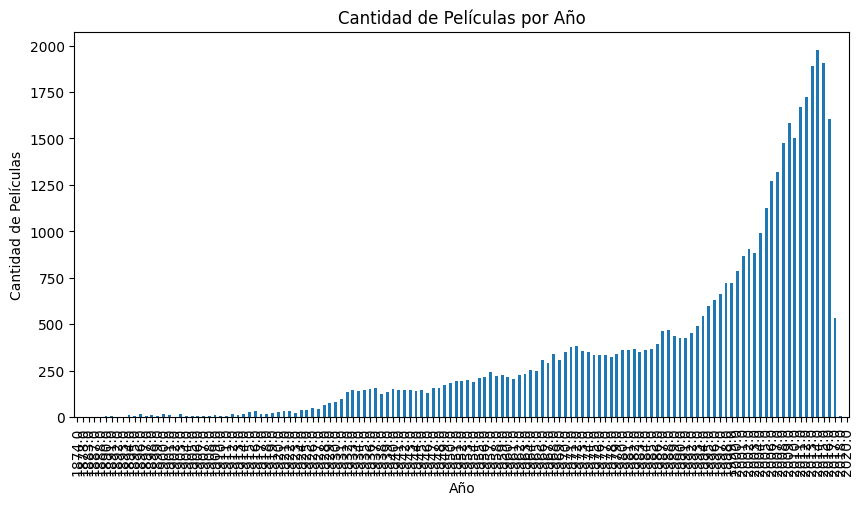

In [55]:
# Análisis de la distribución de películas por año
plt.figure(figsize=(10, 5))
df['release_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Cantidad de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.show()

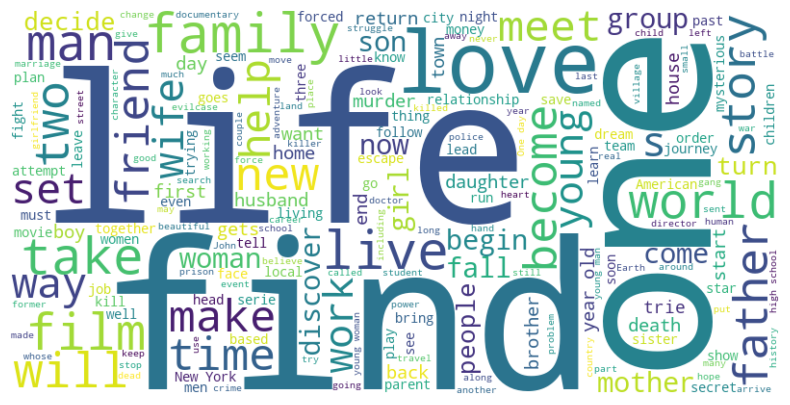

In [57]:
# Genera la nube de palabras con la columna 'overview'
overview_text = ' '.join(df['overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(overview_text)

# Muestra la nube de palabras generada
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()